# 1. Inserting into a Database with SQLite

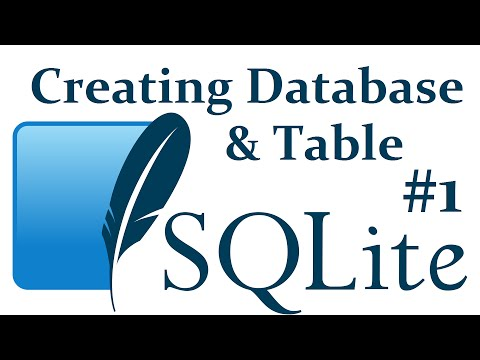

In [38]:
from IPython.display import YouTubeVideo
YouTubeVideo('o-vsdfCBpsU')

## 1.1 SQLite

(1) A lite version of an SQL database:

no server, no user, and no permission; database stored in a single file which may contain multiple tables.

(2) Often used as a developmental and prototyping database, but it can and is used in production.

(3) Main performance issue

Much like any other flat-file, high volume input/output, especially with simultaneous queries, can be problematic and slow.

(4) Differences from a plain file:

* SQLite structures the data as a database which can easily be queried. Each table would likely need its own file if you were doing plain files, and SQLite is all in one.

* SQLite is going to buffer the data. A flat file will require a full load before you can start querying the full dataset, SQLite files don't work that way.

* Edits do not require the entire file to be re-saved, it's just that part of the file. This improves performance significantly.

(5) Although not required, people will generally use all-caps to denote SQL-specific commands.

An SQL query contains both SQL elements and dynamic ones that you set. Since SQL queries are strings, sometimes they can be hard to debug without some sort of differentiation like this. Note, SQLite is not bind to casing, but MySQL is.

## 1.2 Establish a connection and cursor

In [33]:
import sqlite3

# Connect to the database called 'tutorial.db'. If it does't exist, it will be created.
# If it does exist, it will NOT be overwritten or re-created.
conn = sqlite3.connect('tutorial.db')

# Get the cursor which can select/delete/add things and so on.
c = conn.cursor()

## 1.3 Create a table.

SQLite defines five data types for each column:

* NULL
* INTEGER
* REAL
* TEXT
* BLOB

In [34]:
def create_table():
    # Create a table called stuffToPlot if it doesn't exist. This table contains the following columns: 
    # unix, datestamp, keyword, value.
    c.execute("CREATE TABLE IF NOT EXISTS stuffToPlot(unix REAL, datestamp TEXT, keyword TEXT, value REAL)")

## 1.3 Manually insert an entry.

In [35]:
def insert_data_entry():
    # The cursor executes an SQL query "INSERT INTO" to insert a tuple of values into the table 'stuffToPlot'.
    c.execute("INSERT INTO stuffToPlot VALUES(1452549219, '2016-01-11 13:53:39', 'Python', 6)")
    
    # Commit the SQL query "INSERT INTO" and save the change in the table. 
    conn.commit()

## 1.4 Retrieve all entries.

To visualize the table, use [SQLite Browser](https://github.com/sqlitebrowser/sqlitebrowser).

In [36]:
def retrieve_data_entries():
    # Retrieve all entries from the table.
    c.execute("SELECT * FROM stuffToPlot")
    
    rows = c.fetchall()
    
    for row in rows:
        print(rows)

## 1.5 Put everything into together.

In [37]:
create_table()
insert_data_entry()
retrieve_data_entries()

# Close the cursor and the connection.
c.close()
conn.close()

[(1452549219.0, '2016-01-11 13:53:39', 'Python', 6.0)]
